In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf

print(tf.reduce_sum(tf.random.normal([1000, 1000])))

tf.Tensor(-1494.8257, shape=(), dtype=float32)


In [2]:
# Import TensorFlow 
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub
from tensorflow import keras

# Ignore some warnings that are not relevant (you can remove this if you prefer)
import warnings
warnings.filterwarnings('ignore')

# TODO: Make all other necessary imports.
import os
import time
import json
import numpy as np
import matplotlib.pyplot as plt

# get logging
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

/home/timmy/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
len(tf.config.list_physical_devices('GPU'))

0

In [9]:
# check tensor flow environment
print('Using:')
print('\t\u2022 TensorFlow version:', tf.__version__)
print('\t\u2022 tf.keras version:', tf.keras.__version__)
print('\t\u2022 Running on GPU' if len(tf.config.list_physical_devices('GPU')) is not 0 else '\t\u2022 GPU device not found. Running on CPU')

Using:
	• TensorFlow version: 2.9.1
	• tf.keras version: 2.9.0
	• GPU device not found. Running on CPU


In [4]:
# Some other recommended settings:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
tfds.disable_progress_bar()

In [5]:
# TODO: Load the Keras model
# 2022.06.21
# Attempted to reload the custom_model
tf_savedmodel_filepath = './gcolab_epoch015_1655822623'
reload_model = keras.models.load_model(tf_savedmodel_filepath)

In [6]:
reload_model.summary()

Model: "custom_model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 custom_layer_5 (CustomLayer  multiple                 2257984   
 )                                                               
                                                                 
 dense_13 (Dense)            multiple                  256200    
                                                                 
 dropout_5 (Dropout)         multiple                  0         
                                                                 
 dense_14 (Dense)            multiple                  20502     
                                                                 
Total params: 2,534,686
Trainable params: 276,702
Non-trainable params: 2,257,984
_________________________________________________________________


## Sanity Check

Prepare necessary functions

In [9]:
# TODO: Create the process_image function
from PIL import Image

def process_image(image_array, image_size=224):
  tf_im = tf.convert_to_tensor(image_array)
  tf_im = tf.image.resize(tf_im, (image_size, image_size))
  tf_im = tf.cast(tf_im, tf.float32)
  tf_im /= 255
  return tf_im.numpy()

# TODO: Create the predict function
def predict(image_path, model, top_k):
  with Image.open(image_path) as im:
    # convert image to numpy array then preprocess it
    im_arr = np.asarray(im)
    im_arr = process_image(im_arr)
    
    # expand dimension to convert array from shape (224,224,3) to (1,224,224,3)
    im_arr = np.expand_dims(im_arr, axis=0)

    # make prediction
    probs = model.predict(im_arr).flatten()

    # sort the index based on probabilities
    sorted_probs_index = np.argsort(probs)[::-1]
    top_probs_index = sorted_probs_index[:top_k]
    top_probs_value = probs[sorted_probs_index][:top_k]

    return top_probs_value, top_probs_index

define `class_names`

In [7]:
class_names = [
    "pink primrose", "hard-leaved pocket orchid", "canterbury bells",
    "sweet pea", "english marigold", "tiger lily", "moon orchid",
    "bird of paradise", "monkshood", "globe thistle", "snapdragon",
    "colt's foot", "king protea", "spear thistle", "yellow iris",
    "globe-flower", "purple coneflower", "peruvian lily", "balloon flower",
    "giant white arum lily", "fire lily", "pincushion flower", "fritillary",
    "red ginger", "grape hyacinth", "corn poppy", "prince of wales feathers",
    "stemless gentian", "artichoke", "sweet william", "carnation",
    "garden phlox", "love in the mist", "mexican aster", "alpine sea holly",
    "ruby-lipped cattleya", "cape flower", "great masterwort", "siam tulip",
    "lenten rose", "barbeton daisy", "daffodil", "sword lily", "poinsettia",
    "bolero deep blue", "wallflower", "marigold", "buttercup", "oxeye daisy",
    "common dandelion", "petunia", "wild pansy", "primula", "sunflower",
    "pelargonium", "bishop of llandaff", "gaura", "geranium", "orange dahlia",
    "pink-yellow dahlia?", "cautleya spicata", "japanese anemone",
    "black-eyed susan", "silverbush", "californian poppy", "osteospermum",
    "spring crocus", "bearded iris", "windflower", "tree poppy", "gazania",
    "azalea", "water lily", "rose", "thorn apple", "morning glory",
    "passion flower", "lotus", "toad lily", "anthurium", "frangipani",
    "clematis", "hibiscus", "columbine", "desert-rose", "tree mallow",
    "magnolia", "cyclamen", "watercress", "canna lily", "hippeastrum",
    "bee balm", "ball moss", "foxglove", "bougainvillea", "camellia", "mallow",
    "mexican petunia", "bromelia", "blanket flower", "trumpet creeper",
    "blackberry lily"
]

Make prediction

1/1 [==============================] - 1s 1s/step


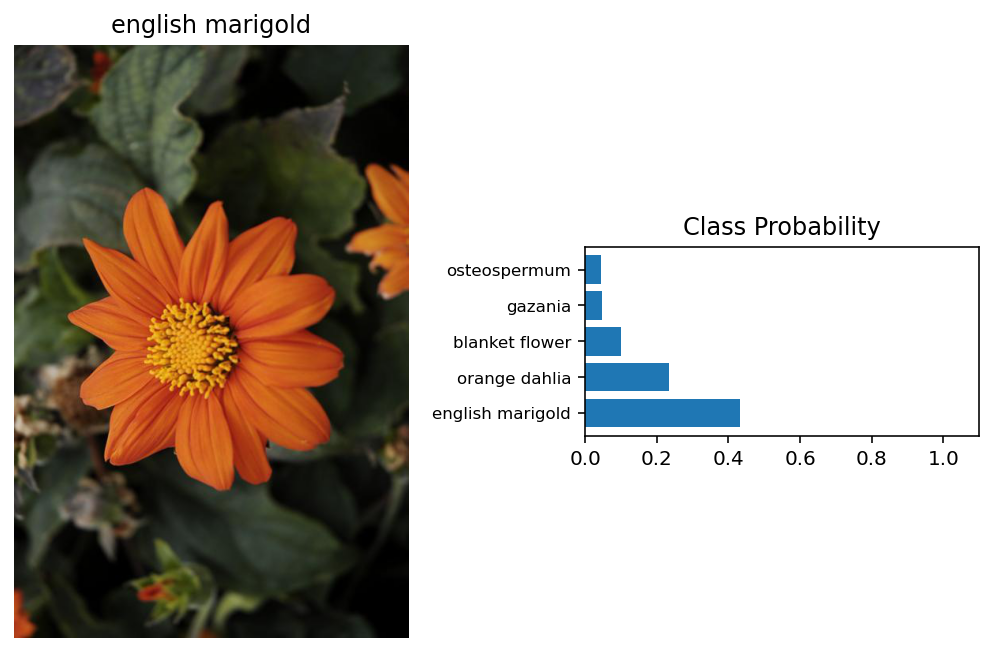

In [10]:
# TODO: Plot the input image along with the top 5 classes
# read image
test_images_dict = {'0':'cautleya_spicata','1':'hard-leaved_pocket_orchid','2':'orange_dahlia','3':'wild_pansy'}
image_path = './test_images/{0}.jpg'.format(test_images_dict['2'])
im = Image.open(image_path)
im_array = np.asarray(im)

# make prediction
top_k = 5
probs, classes = predict(image_path, reload_model, top_k)
labels = [class_names[i] for i in classes.tolist()]

# plot the image and probabilities
fig, (ax1, ax2) = plt.subplots(figsize=(7,13), ncols=2)
ax1.imshow(im_array)
ax1.axis('off')
ax1.set_title(class_names[classes[0]])
ax2.barh(np.arange(top_k), probs)
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(top_k))
ax2.set_yticklabels(labels, size='small');
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)
plt.tight_layout()